In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = 1.2)

In [2]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

pSelect = pd.read_csv('pSelect.csv') #pmatrix with the selected stop types
StopList = pd.read_csv('StopList.csv')
df = pd.read_csv('gapSelect.csv', header=None).rename(columns={0: 'clusterCount', 1: 'gap', 2: 's_k', 3: 'gap-s_k', 4: 'wss'})

os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor")

data = pd.read_csv("dataWNames.csv") #data

In [3]:
df

,clusterCount,gap,s_k,gap-s_k,wss
0,1.0,1.927405,0.001195,1.926211,10473.788098
1,2.0,2.324277,0.000944,2.323333,6474.207873
2,3.0,2.562590,0.000796,2.561795,4826.973117
3,4.0,2.670675,0.000882,2.669793,4137.515144
4,5.0,2.751402,0.000735,2.750668,3681.021620
5,6.0,2.811933,0.000704,2.811229,3358.398046
6,7.0,2.866536,0.000701,2.865834,3101.649231
7,8.0,2.908810,0.000928,2.907882,2898.919659
8,9.0,2.936049,0.000606,2.935443,2758.680070
9,10.0,2.954453,0.001057,2.953396,2648.427337


In [4]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

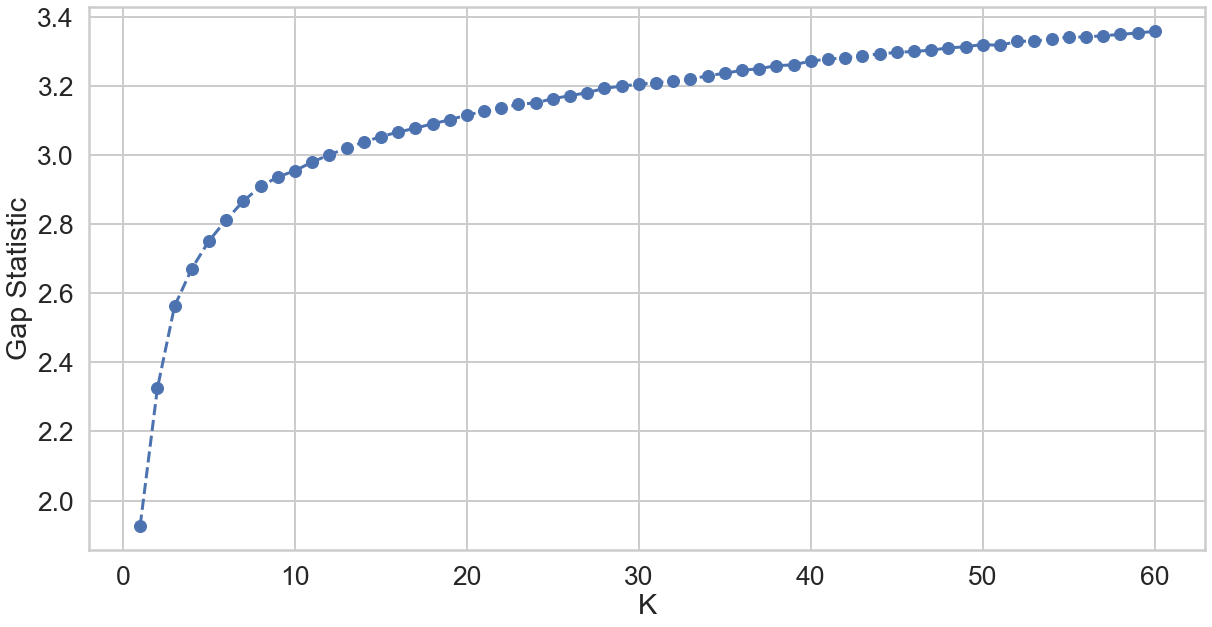

In [5]:
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.savefig('gapStat.png', bbox_inches='tight')

In [6]:
#find the number of clusters, where gap(k) >= gap(k+1)-s_k
cluster = []
for i in range(df.shape[0]-1):
    if df['gap'][i] >= df['gap-s_k'][i+1]:
        #cluster.append(i)
        cluster.append(i+1)
        
cluster

[50, 55]

In [7]:
#p-matrix w. selected cat
pSel = pSelect.to_numpy()

In [8]:
#number of clusters
K = cluster[0]

In [9]:
#Kmeans with the found number of clusters found with gap statistic
Kmean = KMeans(n_clusters=K, random_state = 1243)

In [10]:
Kmean.fit(pSel)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1243, tol=0.0001, verbose=0)

In [11]:
centroid = Kmean.cluster_centers_

In [12]:
#Check if shape is right
np.shape(centroid)

(50, 13)

In [13]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/CSV files")

#save centroid
pd.DataFrame(centroid).to_csv('centroid.csv', index = False)

In [14]:
#label of each user
label = Kmean.labels_

In [15]:
#save label
pd.DataFrame(label).to_csv('labels.csv', index = False)

In [16]:
#create array for each cluster with index of users
for i in range(0,K):
    exec(f'c{i} = np.where(label == i)')

In [17]:
#create array with the probability for each element in each cluster
for i in range(0,K):
    exec(f'prob{i} = pSel[c{i}]')

In [18]:
#make matrix, with axis 0 = length of StopList(number of selected Stops). axis 1 = number of clusters
avg = np.zeros((len(StopList),K))

In [19]:
for j in range(0,K):
    for i in range(0, len(StopList)):
        exec(f'avg[i,j] = np.sum(prob{j}[:,i]) / np.shape(prob{j})[0]') #avg (sum of prob for each stop / number of users)

In [20]:
pd.DataFrame(avg).to_csv('avg.csv', index = False)

In [21]:
os.chdir("/Users/Ellen/Documents/Dokumenter/DTU/7. Semester/Bachelor/Plots")

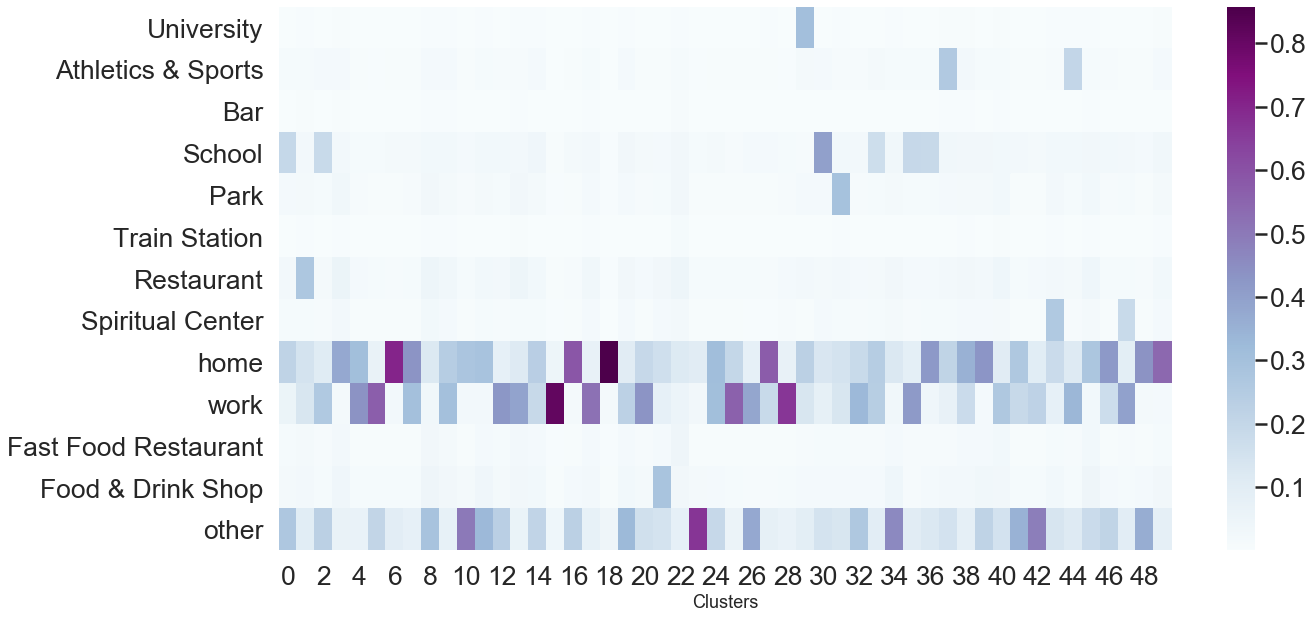

In [22]:
#heatmap without log
ax = sns.heatmap(avg, cmap="BuPu")
ax.set_yticklabels(StopList.Stop.tolist())
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
plt.xlabel('Clusters', fontsize = 18)
plt.savefig('KmeanheatmapBigram.png', bbox_inches='tight') #save plot
plt.show()

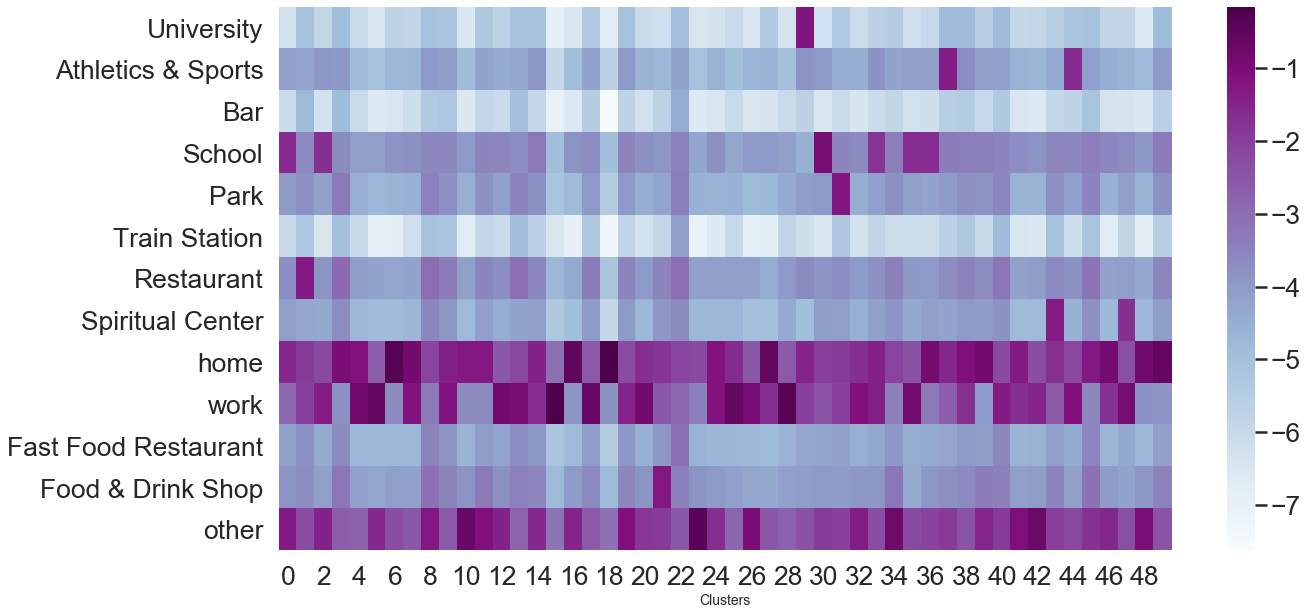

In [23]:
#heatmap with log
ax = sns.heatmap(np.log(avg), cmap="BuPu")
ax.set_yticklabels(StopList.Stop.tolist())
plt.setp(ax.get_yticklabels(), rotation=0, ha="right",
             rotation_mode="anchor")
plt.xlabel('Clusters', fontsize = 14)
plt.savefig('KmeanheatmapBigramLog.png', bbox_inches='tight') #save plot
plt.show()